# Dimension Reduction 

**Reference :**
- https://s3.amazonaws.com/kajabi-storefronts-production/file-uploads/sites/2147512189/themes/2150624317/downloads/a32e1eb-c14a-3f5f-46c3-8dbd63332ad6_Principle_Components_Analysis_PCA_.pdf
- https://www.analyticsvidhya.com/blog/2021/09/pca-and-its-underlying-mathematical-principles/
- https://learnche.org/pid/latent-variable-modelling/principal-component-analysis/mathematical-derivation-for-pca


**Contents :**
- [1. Features Selection](#fs)
- [2. PCA](#pca)
- [3. Regularization](#r)
    - [Trade-off between bias and variance](#tradeoff) 
    - [(L1) Lasso  Regression](#l1) 
    - [(L2) Ridge  Regression](#l2) 
    - [(L1+L2) Elastic net regularization](#en) 
    - [Dropout (Neural Network)](#dt) 
    - [Data Augmentation](#da) 
    - [Early Stopping](#es) 

<a name="fs"></a>
## Feature Selection

### Why ? (Advantages)
- Avoid the curse of dimensionality
- Improves predictive performance and interpretability of models
- Shorten training times → improve computational efficiency reduce generalization error of the model by removing irrelevant features or noise
- Improves the predictive power of the model if a model suffers from overfitting

### Types
#### 1. Intrinsic methods
**Definition:** Embedded methods or implicit methods.Have feature selection naturally embedded with the training process

<img style="float: middle;" src=intrinsic.png width="50%">

**Types :**
- Tree-based models:
    - Search for the best feature to split node so that the outcomes are more homogeneous with each new partition.
    - If a feature is not used in any split, it’s independent of the target variable
- Regularization models:
    - L1-regularization penalizes many of estimated coefficients to zero → only keep features with nonzero coefficients
    - Models use regularization, e.g. linear regression, logistic regression, SVMs.

**Pros:**
- Fast because feature selection is embedded within model fitting process
- No external feature selection tool is needed.
- Provides a direct connection between feature selection and the object function (e.g. maximize information gain in decision trees, maximize likelihood function in logistic regression) which makes it easier to make informed choice.

**Cons:**
- Model-dependent and the choice of models is limited.

#### 2. Filter methods
**Definition:** Select features that correlate well with target variable.Evaluation is independent of the algorithm.

<img style="float: middle;" src=filter.png width="50%">

**Types :**
- Univariate statistical analysis: Analyze how each feature correlates with the target variable and select the ones with higher correlations.
- Feature Importance-based: Use feature importance scores to select features to keep (highest scores) or delete (lowestscores).
    - Coefficients as feature importance, e.g. linear regression, logistic regression.
    - Impurity-based feature importances, e.g. tree-based models.
        
**Pros:**
- Simple and fast.
- Can be effective at capturing the large trends in the data.

**Cons:**
- Tend to select redundant features.
- Ignore relationships among features.

#### 3. Wrapper methods
**Definition:** Iterative process that repeatedly add subsets of feature to the model and then use the resulting model
performance to guide the selection of the next subset.

<img style="float: middle;" src=wrapper.png width="50%">

**Types :**
- Sequential feature selection (SFS): A family of greedy search algorithms that are used to automatically select a subset of features that are most relevant to the problem.
    - Forward SFS: 
        - Iteratively finds the best new feature to add to the set of selected features.
        - Start with zero feature and find the one feature that maximizes a cross-validated score when a model is trained on this single feature.
        - Once that first feature is selected, we repeat the procedure by adding a new feature to the set of selected features.
        - The procedure stops when the desired number of selected features is reached.
        
    - Backward SFS:
        - Start with all the features and sequentially remove features from the set until the desired number of features is reached.
- Subset Selection : This is a method where all possible combinations of variables are considered, and a model is selected based on a criterion (such as minimum AIC/BIC or maximum R-squared). Subset selection is computationally expensive and can become intractable with a large number of variables.

**Pros:**
- Search for a wider variety of feature subsets than other methods.
- Consider features that are already selected when choosing a new feature.

**Cons:**
- Have the most potential to overfit the features to the training data.
- Significant computation time when the number of features is large.

<a name="pca"></a>
## PCA

### Definition:

PCA (Principal Component Analysis) is a dimensionality reduction technique that transforms input features into their principal components. The idea behind PCA is to **find a low-dimension set of axes that summarizes data**. PCA is used when we have a large dataset with multiple dimensions or features, and it is difficult to understand hidden patterns in the data just by looking at it.

For instance, consider a dataset of laptops where each laptop is described by several properties such as size, color, screen size, weight, processor, number of USB slots, operating system, touch screen, etc. Many of these features will measure related properties, making them redundant. PCA helps to remove this redundancy and identify the most important features that will help distinguish the laptops from each other.

PCA **maps the data from the original high-dimensional space to a lower-dimensional space that captures as much of the variation in the data as possible**. It converts a set of observations of possibly correlated features into a set of values of linearly uncorrelated features. It performs a linear transformation on the original set of features to a new space composed of the principal components. These new features do not have any real meaning except algebraic.  

### How does it work ?

<img style="float: left;" src="https://editor.analyticsvidhya.com/uploads/27815Schematic-of-the-PCA-transformation-Original-data-space-presented-on-the-left-with-3.png" width="70%"> 

#### Steps 

##### Basic Ideas 

Say we have a 3-dimensional [x1,x2,x3] space K and we have data X (pink point) in this K space (left). 

<img style="float: left;" src="https://learnche.org/pid/_images/geometric-PCA-1-and-2-swarm-with-mean.png" width="60%"> 

The first step in PCA is to move the data to the center of the coordinate system. This is called mean-centering and removes the arbitrary bias from measurements that we don’t wish to model. We also scale the data, usually to unit-variance. This removes the fact that the variables are in different units of measurement. After centering and scaling we have moved our raw data to the center of the coordinate system and each variable has equal scaling. **(left)**

The best-fit line is drawn through the swarm of points. The more correlated the original data, the better this line will explain the actual values of the observed measurements. **This best-fit line will best explain all the observations with minimum residual error. Another, but equivalent, way of expressing this is that the line goes in the direction of maximum variance of the projections onto the line**. **(right)**

When the direction of the best-fit line is found we can mark the location of each observation along the line. We find the 90 degree projection of each observation onto the line (see the next illustration). The distance from the origin to this projected point along the line is called the score. Each observation gets its own score value. When we say the best-fit line is in the direction of maximum variance, what we are saying is that the variance of these scores will be maximal. 

<img style="float: left;" src="https://learnche.org/pid/_images/geometric-PCA-3-and-4-centered-with-first-component.png" width="60%"> 

After we have added this best-fit line to the data, we have calculated the first principal component, also called the first latent variable. 

Each principal component consists of two parts:

- The direction vector that defines the best-fit line. This is a K-dimensional vector that tells us which direction that best-fit line points, in the K-dimensional coordinate system. We call this direction vector p1, it is a K * 1 vector. This vector starts at the origin and moves along the best-fit line. Since vectors have both magnitude and direction, we chose to rescale this vector so that it has magnitude of exactly 1, making it a unit-vector.

- The collection of N score values along this line. We call this our score vector, t1, and it is an N * 1 vector.

<img style="float: left;" src="https://learnche.org/pid/_images/geometric-PCA-5-and-6-first-component-with-projections-and-second-component.png" width="60%"> 

This first principal component is fixed and we now add a second component to the system. We find the second component so that it is perpendicular to the first component’s direction. Notice that this vector also starts at the origin, and can point in any direction as long as it remains perpendicular to the first component. We keep rotating the second component’s direction vector around until we find a direction that gives the greatest variance in the score values when projected on this new direction vector.

What that means is that once we have settled on a direction for the second component, we calculate the scores values by perpendicularly projecting each observation towards this second direction vector. The score values for the second component are the locations along this line. As before, there will be some positive and some negative score values. This completes our second component:

- This second direction vector, called p2, is also a K * 1 vector. It is a unit vector that points in the direction of next-greatest variation.
- The scores (distances), collected in the vector called t2, are found by taking a perpendicular projection from each observation onto the vector.

Notice that the p1 and p2 vectors jointly define a plane. This plane is the latent variable model with two components. With one component the latent variable model is just a line, with two components, the model is a plane, and with 3 or more components, the model is defined by a hyperplane.

##### Sample Code

##### Step 01 : Standardization

The first step in PCA is to **move the data to the center of the coordinate system** (right). This is called mean-centering and removes the arbitrary bias from measurements that we don’t wish to model. We also scale the data, usually to unit-variance. This removes the fact that the variables are in different units of measurement. After centering and scaling we have moved our raw data to the center of the coordinate system and each variable has equal scaling (left).

The reason why it is important to perform standardization before PCA is that the latter is extremely sensitive regarding the variances of the variables. i.e. **if there are large differences between the ranges of initial variables, those variables with larger ranges will dominate over those with small ranges**(For example, a variable that ranges between 0 and 100 will dominate over a variable that ranges between 0 and 1), which can cause biased results. So transforming the data to comparable scales will prevent this problem.

In [30]:
import pandas as pd
df = pd.read_csv('/Users/crystal/Desktop/Dimension Reduction/AirQualityUCI.csv', sep=';')

In [31]:
df.shape

(9471, 17)

In [32]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [33]:
df = df.drop(columns=df.columns[-2:])
df = df.dropna()
df.shape

(9357, 15)

In [38]:
# Loop through each column in the dataframe
for col in df.iloc[:, 2:]:
    # Check if the column is a string type
    if df[col].dtype == "object":
        # Replace all commas with periods
        df[col] = df[col].str.replace(",", ".")
        # Convert the column to a numeric type
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [39]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [41]:
from scipy.stats import zscore
df_num_scaled = df.iloc[:, 2:].apply(zscore)
df_num_scaled.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,0.474000,0.942983,2.211236,0.242504,0.442297,-0.010166,0.810649,0.432124,0.643258,0.641101,0.088462,0.183831,0.194881
1,0.466273,0.736807,1.939383,0.182085,0.176459,-0.254902,1.177136,0.266684,0.358574,-0.006723,0.081518,0.160400,0.194052
2,0.468849,1.070327,1.767687,0.172418,0.129719,-0.146131,1.071538,0.440002,0.350012,0.216513,0.049112,0.283414,0.194686
3,0.468849,0.991495,1.710454,0.177252,0.156010,0.013142,0.922459,0.503027,0.412086,0.498842,0.028279,0.400571,0.195622
4,0.461122,0.676167,1.502988,0.112000,-0.171174,-0.146131,1.273416,0.455759,0.210881,0.295303,0.032909,0.392761,0.195676


##### Step 02 : Statistic tests 
The following are the 2 tests that we perform on the dataset to identify whether to perform PCA on the given dataset or not to perform the same.

1. Bartlett’s Test of Sphericity : It tests the hypothesis that the variables are uncorrelated within the population.
- H0: Null Hypothesis: All variables in the data are uncorrelated.
- Ha: Alternate Hypothesis: At least one pair of variables in the data are correlated if the null hypothesis cannot be rejected, then PCA is not advisable.

If the p-value is small, then we can reject the Null Hypothesis and agree that there is at least one pair of variables in the data which are correlated hence PCA is recommended.

2. The Kaiser-Meyer-Olkin (KMO) – a Measure of Sampling Adequacy (MSA): KMO is an index used to determine how appropriate PCA is. 

Generally, if MSA is less than 0.5, PCA is not recommended, since no reduction is expected. On the other hand, MSA>0.7 is expected to provide a considerable reduction in the dimension and extraction of meaningful components.

In [45]:
#!pip install factor-analyzer

**Bartlett’s Test of Sphericity**

In [44]:
#The following is the code for performing Bartlett’s Test of Sphericity:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_num_scaled)
p_value

0.0

**Interpretation:**
For our dataset p_value is 0.0 which is less than 0.05. Hence we can reject the Null Hypothesis and agree that there is at least one pair of variables in the data which are correlated. Hence, PCA is recommended.

**The Kaiser- Meyer- Olkin (KMO)- test**

In [46]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_num_scaled)
kmo_model

/opt/anaconda3/lib/python3.8/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.725408039125075

**Interpretation:** For our dataset MSA value is 0.7254 (by considering four decimal points) which is higher than 0.7. Hence, performing PCA on our dataset is expected to provide a considerable reduction in the dimension and extraction of meaningful components.

##### Step 03: Covariance Matrix Computation
In this step, we will try to identify if there is any relationship between the variables in the dataset. As sometimes, variables are highly correlated in a way such that the information contained in them is redundant. So as to identify these co-relations, we compute the Covariance Matrix.

In [48]:
#The following is the code for computing Covariance Matrix using Python:
import numpy as np
cov_matrix = np.cov(df_num_scaled.T)
print('Covariance Matrix n%s', cov_matrix)

Covariance Matrix n%s [[ 1.00010688e+00  4.14158342e-02  1.28364886e-01 -3.13816293e-02
   2.99290193e-02  5.26507194e-01 -8.99904648e-02  6.71198796e-01
  -7.37318448e-02  8.03182299e-02 -6.89462665e-02 -4.82325238e-02
  -4.58971356e-02]
 [ 4.14158342e-02  1.00010688e+00  1.70025463e-01  8.52778515e-01
   9.33201472e-01  2.78022262e-01  8.70287346e-02  1.54045989e-01
   8.45238982e-01  8.92529820e-01  7.54924778e-01  7.45455138e-01
   7.64984673e-01]
 [ 1.28364886e-01  1.70025463e-01  1.00010688e+00  3.73265072e-02
   1.10115296e-01 -4.42772515e-03  4.88261057e-02  1.03318537e-01
   1.62697330e-01  1.01195888e-01 -9.00888489e-06  8.28515423e-03
   1.25014573e-02]
 [-3.13816293e-02  8.52778515e-01  3.73265072e-02  1.00010688e+00
   7.67515088e-01 -1.17410138e-03  5.12247447e-01 -1.09936593e-02
   7.74756227e-01  6.41402887e-01  9.71478837e-01  9.25161240e-01
   9.84660302e-01]
 [ 2.99290193e-02  9.33201472e-01  1.10115296e-01  7.67515088e-01
   1.00010688e+00  3.31307692e-01 -7.3675239

##### Step 04 : Computing Eigenvectors and Eigenvalues
**Mathematically speaking, Principal Components represent the directions of the data that specify a maximum amount of variance i.e. the lines that capture most information present in the data**. 

In [52]:
#The following is the code for computing Eigen Values and Eigen Vectors:

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('\n Eigen Values \n %s', eig_vals)
print('\n')
print('Eigen Vectors \n %s', eig_vecs)


 Eigen Values 
 %s [6.58550956e+00 2.94514699e+00 1.40898076e+00 1.03240134e+00
 3.93794211e-01 2.50768473e-01 1.31583463e-01 1.05688899e-01
 7.65118335e-02 3.98107822e-02 2.82213615e-02 2.60827588e-03
 3.63543273e-04]


Eigen Vectors 
 %s [[ 4.10216218e-03  3.61868679e-01  5.28426727e-01  6.08863268e-02
  -7.05109140e-01 -2.84603905e-01  7.84072272e-02  3.03531567e-02
   2.88180338e-02 -1.24659475e-03 -3.10992002e-03  1.81271583e-03
  -2.08288436e-05]
 [-3.63754248e-01  1.41825055e-01 -1.42422078e-01  5.41291099e-02
   3.12132954e-02 -1.63429525e-01 -3.85919528e-02  6.88110888e-02
  -4.57408024e-02 -8.16106276e-01  3.48708980e-01 -2.60349834e-02
   7.01853643e-03]
 [-3.82796881e-02  7.65632676e-02  4.41570250e-02  9.61506833e-01
   1.79993204e-01 -6.85691286e-02 -6.15521174e-02 -1.77117785e-02
   1.20788129e-01  1.01447551e-01 -1.33614302e-03 -1.11954492e-02
  -4.16508044e-03]
 [-3.80572291e-01 -7.98173701e-02  1.04669255e-01 -5.31029001e-02
   4.04841663e-02 -9.20324060e-03 -9.65951

In [53]:
#The following is the code for Cumulative Variance explained.

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained \n", var_exp)
print("\n")
print("Cumulative Variance Explained \n", cum_var_exp)

Variance Explained 
 [50.652351942836496, 22.652555670888407, 10.83715520014694, 7.940700003934049, 3.0288625041376687, 1.9287820985830757, 1.0120723087679886, 0.8129046469948121, 0.5884896657147087, 0.3062040581205773, 0.21706419566521581, 0.020061516358843443, 0.002796187851219495]


Cumulative Variance Explained 
 [ 50.65235194  73.30490761  84.14206281  92.08276282  95.11162532
  97.04040742  98.05247973  98.86538438  99.45387404  99.7600781
  99.9771423   99.99720381 100.        ]


**Interpretation:** For our dataset, from the above output, we can see that the cumulative variance explained for the 3 components is around 84.1421 percent. So in general we will consider the Principal Components up until **80 to 85 percent** of the variance. However, the number of Principal Components to be selected for further analysis depends on the Business problem which we are trying to solve. However, in this case, study, let us consider the first 3 principal components which are explaining around 84% of the variance of the dataset.

Thus, after performing PCA we have actually reduced the dimensions of the dataset from 14 features initially to 3 Principal components which are useful for further analysis as it is explaining around 84% of the variation in the dataset.

##### Step 05: Scree Plot to decide on the Number of PCS
A Scree plot always **displays the Eigenvalues in a downward curve, ordering the eigenvalues from largest to smallest**. According to the Scree test, the ”elbow” of the graph where the Eigenvalues seem to level off is found and factors or components to the left of this point should be retained as significant.

The Scree Plot is used to determine the number of Principal Components to keep in a Principal Component Analysis(PCA).

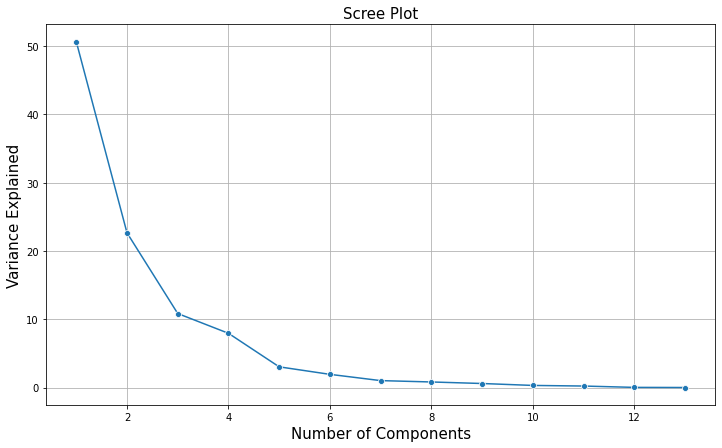

In [56]:
#The following is the code for plotting the Scree Plot:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,7))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

**Interpretation:**
From the above Scree Plot, we can see that it is basically an elbow-shaped graph. Where in for our dataset up until 3 Principal Components there is a significant variation or change in the variance explained. Post which it is almost a constant or there is no significant variation. So this by looking at the Scree Plot we can consider the number of Principal Components to be 3 for our dataset. However, as explained above the number of Principal Components to be selected largely depends on the business problem which we are trying to solve.

##### Step 06: Recasting the Data along with Principal Component Axes
In this step, we are going to use the feature vector formed using the Eigenvectors of the Covariance Matrix, to reorient the data from the original axes to the ones represented by the Principal Components. (Hence the name Principal Component Analysis).

In [77]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in oneshot
from sklearn.decomposition import PCA
# NOTE - we are generating only 3 PCA dimensions (dimensionality reduction from 16 to 3)
pca = PCA(n_components=3, random_state=123)
df_pca = pca.fit_transform(df_num_scaled)
df_pca.transpose() # Component output
# Get the loading scores of each principal component
df_pca_loading = pd.DataFrame(pca.components_.T, columns=['PC'+str(i) for i in range(3)], index=df_num_scaled.columns).T
df_pca_loading

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PC0,0.004102,-0.363754,-0.038280,-0.380572,-0.337777,-0.037320,-0.143070,-0.016872,-0.337443,-0.298611,-0.361022,-0.346578,-0.362817
PC1,0.361869,0.141825,0.076563,-0.079817,0.196226,0.527856,-0.380496,0.482840,0.035878,0.275625,-0.154940,-0.136084,-0.147896
PC2,-0.528427,0.142422,-0.044157,-0.104669,0.260650,-0.112936,-0.501695,-0.365940,0.232305,0.282819,-0.140758,-0.176573,-0.190604


Let’s identify which features have Maximum loading across the components. We will first plot the component loading on a heatmap.

For each feature, we find the maximum loading value across the components and mark the same with the help of a rectangular box.

Features marked with the rectangular red boxes are the ones having maximum loading on the respective component. We consider these marked features to decide the context that the component represents.

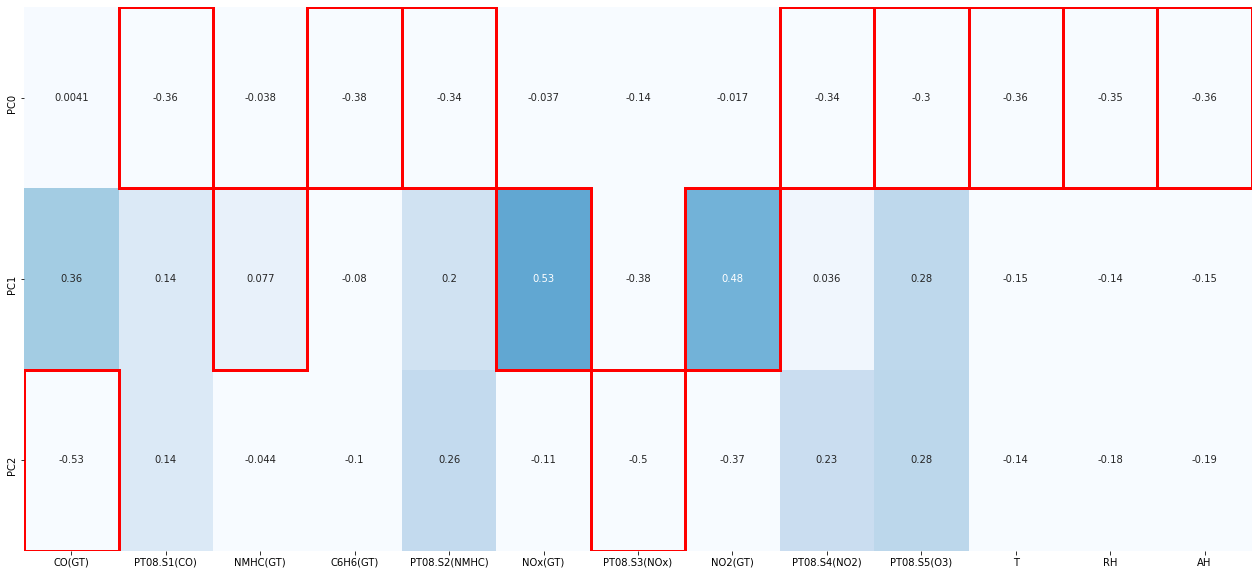

In [78]:
# Code for plotting the Heatmap is as below:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots(figsize=(22, 10), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_pca_loading, annot=True, vmax=1.0, vmin=0, cmap='Blues', cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0', 'PC1', 'PC2'], xticklabels=df_pca_loading.columns)
column_max = df_pca_loading.abs().idxmax(axis=0)
for col, variable in enumerate(df_pca_loading.columns):
    position = df_pca_loading.index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position), 1, 1, fill=False, edgecolor='red', lw=3))

**Interpretation:**

From the above Heat Map, we can see that :

- Principal Component 1(PC0) is a Linear Combination of features PT08.S1(CO),C6H6(GT), PT08.S2(NMHC),T08.S4(NO2), PT08.S5(O3),T, RH and AH; 
- Principal Component 2(PC1) is a Linear Combination of features NMHC(GT), NOx(GT) and NO2(GT);
- Principal Component 3(PC2) is a Linear Combination of features CO(GT) and PT08.S3(NOx)

#### Pros and Cons
##### Advantages
- Removes correlated features and noise in the data
    - All the PCs are independent of each other. There is no correlation among them.
    - The first few PCs can capture majority of variance in the data and the rest just represent noise in the data.
    - A data preprocessing step before using a learning algorithm - transformed data are available to use.
- Improves algorithm performance
    - With high-dimensional features, the performance of an algorithm will degrade.
    - PCA speeds up the algorithm by getting rid of correlated features and noise which don’t contribute in any decision making. The training time of the algorithms reduces significantly with less number of features.
- Visualizes high-dimensional data
    - PCA transforms a high dimensional data to low dimensional data (2 or 3 dimensions) so that the data can be visualized easily.

##### Limitations
- PCA is not scale invariant, **it is sensitive to the relative scaling of the input feature**.
- Features become **less interpretable**: PCs are the linear combination of the original features and they are not as readable and interpretable as original features.
- Only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this but some are not.
- PCA is an unsupervised learning method, so it does not take labels into account

<a name="r"></a>
## Regularization 

### Definition: 

Regularization is a technique used in machine learning to prevent overfitting by adding additional information to the model. It works by **shrinking the coefficient estimates towards zero, which forces the model to learn a less complex or flexible model**. This is achieved by introducing a penalty for bringing in more features to the model, and its value increases when the model becomes more complex. By pushing the coefficients towards zero, the model becomes less complex, and the generalization of the model is improved while maintaining accuracy.

### When to Use Regularization

- To handle collinearity (high correlation among features).
- To filtering out noise from data.
    - By noise we mean those data points in the dataset which don’t really represent the true properties of your data, but only due to a random chance.
- To remove the complexity of a model and eventually reduce variance (prevent overfitting).

<a name="tradeoff"></a>
### Context Knowledge : Trade-off between Bias and Variance
#### What is bias?

**Bias is the difference between the average prediction of our model and the correct value which we are trying to predict**. Model with high bias pays very little attention to the training data and oversimplifies the model. It always leads to high error on training and test data.

#### What is variance?

Variance is the variability of model prediction for a given data point or a value which tells us **spread of our data**. Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. As a result, such models perform very well on training data but has high error rates on test data.

Assume we try to predict the relationship between Y and other covariates (X): $Y = f(X) + e$ using $\hat{f(x)}$.

The expected squared error at a point x is : $Err(x) = E[(Y-\hat{f(x)})^2]$

The $Err(x)$ can be further decomposed as :

$Err(x) = [E[\hat{f(x)}] - f(x)]^2 + E[(\hat{f(x)}-E[\hat{f(x)}])^2] + \sigma_e^2$

$Err(x) = Bias^2 + Variance + Irreducible Error $

Irreducible error is the error that can’t be reduced by creating good models. It is a measure of the amount of noise in our data. Here it is important to understand that no matter how good we make our model, our data will have certain amount of noise or irreducible error that can not be removed.

#### Why is Bias Variance Tradeoff?
**If our model is too simple and has very few parameters then it may have high bias and low variance. On the other hand if our model has large number of parameters then it’s going to have high variance and low bias**. So we need to find the right/good balance without overfitting and underfitting the data.

This tradeoff in complexity is why there is a tradeoff between bias and variance. An algorithm can’t be more complex and less complex at the same time.

#### Solution
The general solution to this is: **reduce variance at the cost of introducing some bias**. This approach is called **regularization** and is almost always beneficial for the predictive performance of the model. 

As the model complexity, which in the case of linear regression can be thought of as the number of predictors, increases, estimates' variance also increases, but the bias decreases. The unbiased OLS would place us on the right-hand side of the picture, which is far from optimal. 

That's why we regularize: to lower the variance at the cost of some bias, thus moving left on the plot, towards the optimum.

<img style="float: left;" src="https://media.geeksforgeeks.org/wp-content/uploads/20200107023418/1_oO0KYF7Z84nePqfsJ9E0WQ.png" width="45%"> 

<img style="float: right;" src="https://miro.medium.com/v2/resize:fit:936/1*xwtSpR_zg7j7zusa4IDHNQ.png" width="40%"> 

<img style="float: left;" src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*9hPX9pAO3jqLrzt0IE3JzA.png" width="80%"> 

### Regularization Techiniques
<a name="lp"></a>
#### 1. Lp norm. Most widely used methods: **L1 (lasso) and L2 (ridge) regularizations**.

$ℓp = (\sum_{i=1}^{N} |x_i|^p)^ 1/p$ for $ p\geq$ 1

- For $p=1$, we get $ℓ1 = |x_1|+|x_2|+…+|x_n|$

- For $p=2$, we get $ℓ2 = \sqrt{x_1^2+x_2^2+…+x_n^2}$

- For $p=3$, we get $ℓ3 = \sqrt[3]{|x_1|^3+|x_2|^3+…+|x_n|^3}$

- For $p→∞$, we get $ℓ∞ = max_i(|x_1|,|x_2|,…,|x_n|)$

<img style="float: left;" src="https://ekamperi.github.io/images/lp_norms_2d.png" width="80%"> 

<a name="l1"></a>
##### (L1) Lasso  Regression 

##### Concepts

L1 regularization adds L1-norm $(\alpha\sum_{j=1}^{m}|w_j|)$ to the loss function. L1 regularizes the absolute sum of
the weights.

Lasso Regression : $\underset {w}{min}\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \alpha\sum_{j=1}^{m}|w_j|$

- $\alpha$ : controls the regularization strength
    - We need to be careful when adjusting the regularization strength. If the regularization strength is too high and the weight coefficients shrink to zero, the model can perform poorly due to underfitting.

<img style="float: left;" src=lasso.png width="50%">

1. Contours: the mean squared error loss function (the squared distance between the true andpredicted values) for two weight coefficients,$w_1$ and $w_2$.The goal is to **find the combinations of $w_1$ and $w_2$ that minimize the loss function**.
2. Diamond: the sum of the absolute weight coefficients.
    - Larger $\alpha$ → smaller diamond.
    - By increasing $\alpha$, we shrink the weights towards zero.
3. Solution:
    - Balance two different losses - cannot decrease either loss without increasing the other.
    - Diamond intersects with the contours of the unpenalized loss function. Either or becomes zero (sparse vector).

##### Pros and Cons
- The only norm that introduces sparsity in the solution and remains convex for easy optimization.
- L1 performs feature selection by deciding which features are essential for prediction and which are not (will be forced to be exactly zero). It helps increase model interpretability.
- It’s useful in cases where we have a high-dimensional dataset with many features that are irrelevant.
- Makes our models more efficient to store and compute.
- The result of L1 may be inconsistent, the parameters may differ from each training.

In [146]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

#data
boston = load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
#target variable
boston_df['Price']=boston.target
#preview
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot: >

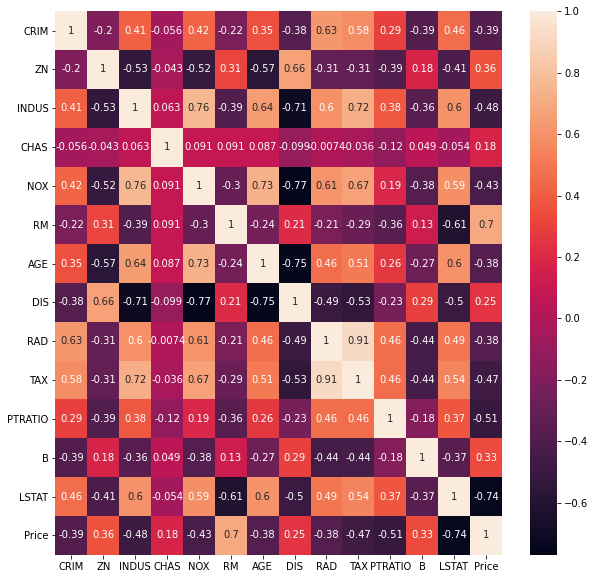

In [147]:
#Exploration
plt.figure(figsize = (10, 10))
sns.heatmap(boston_df.corr(), annot = True)

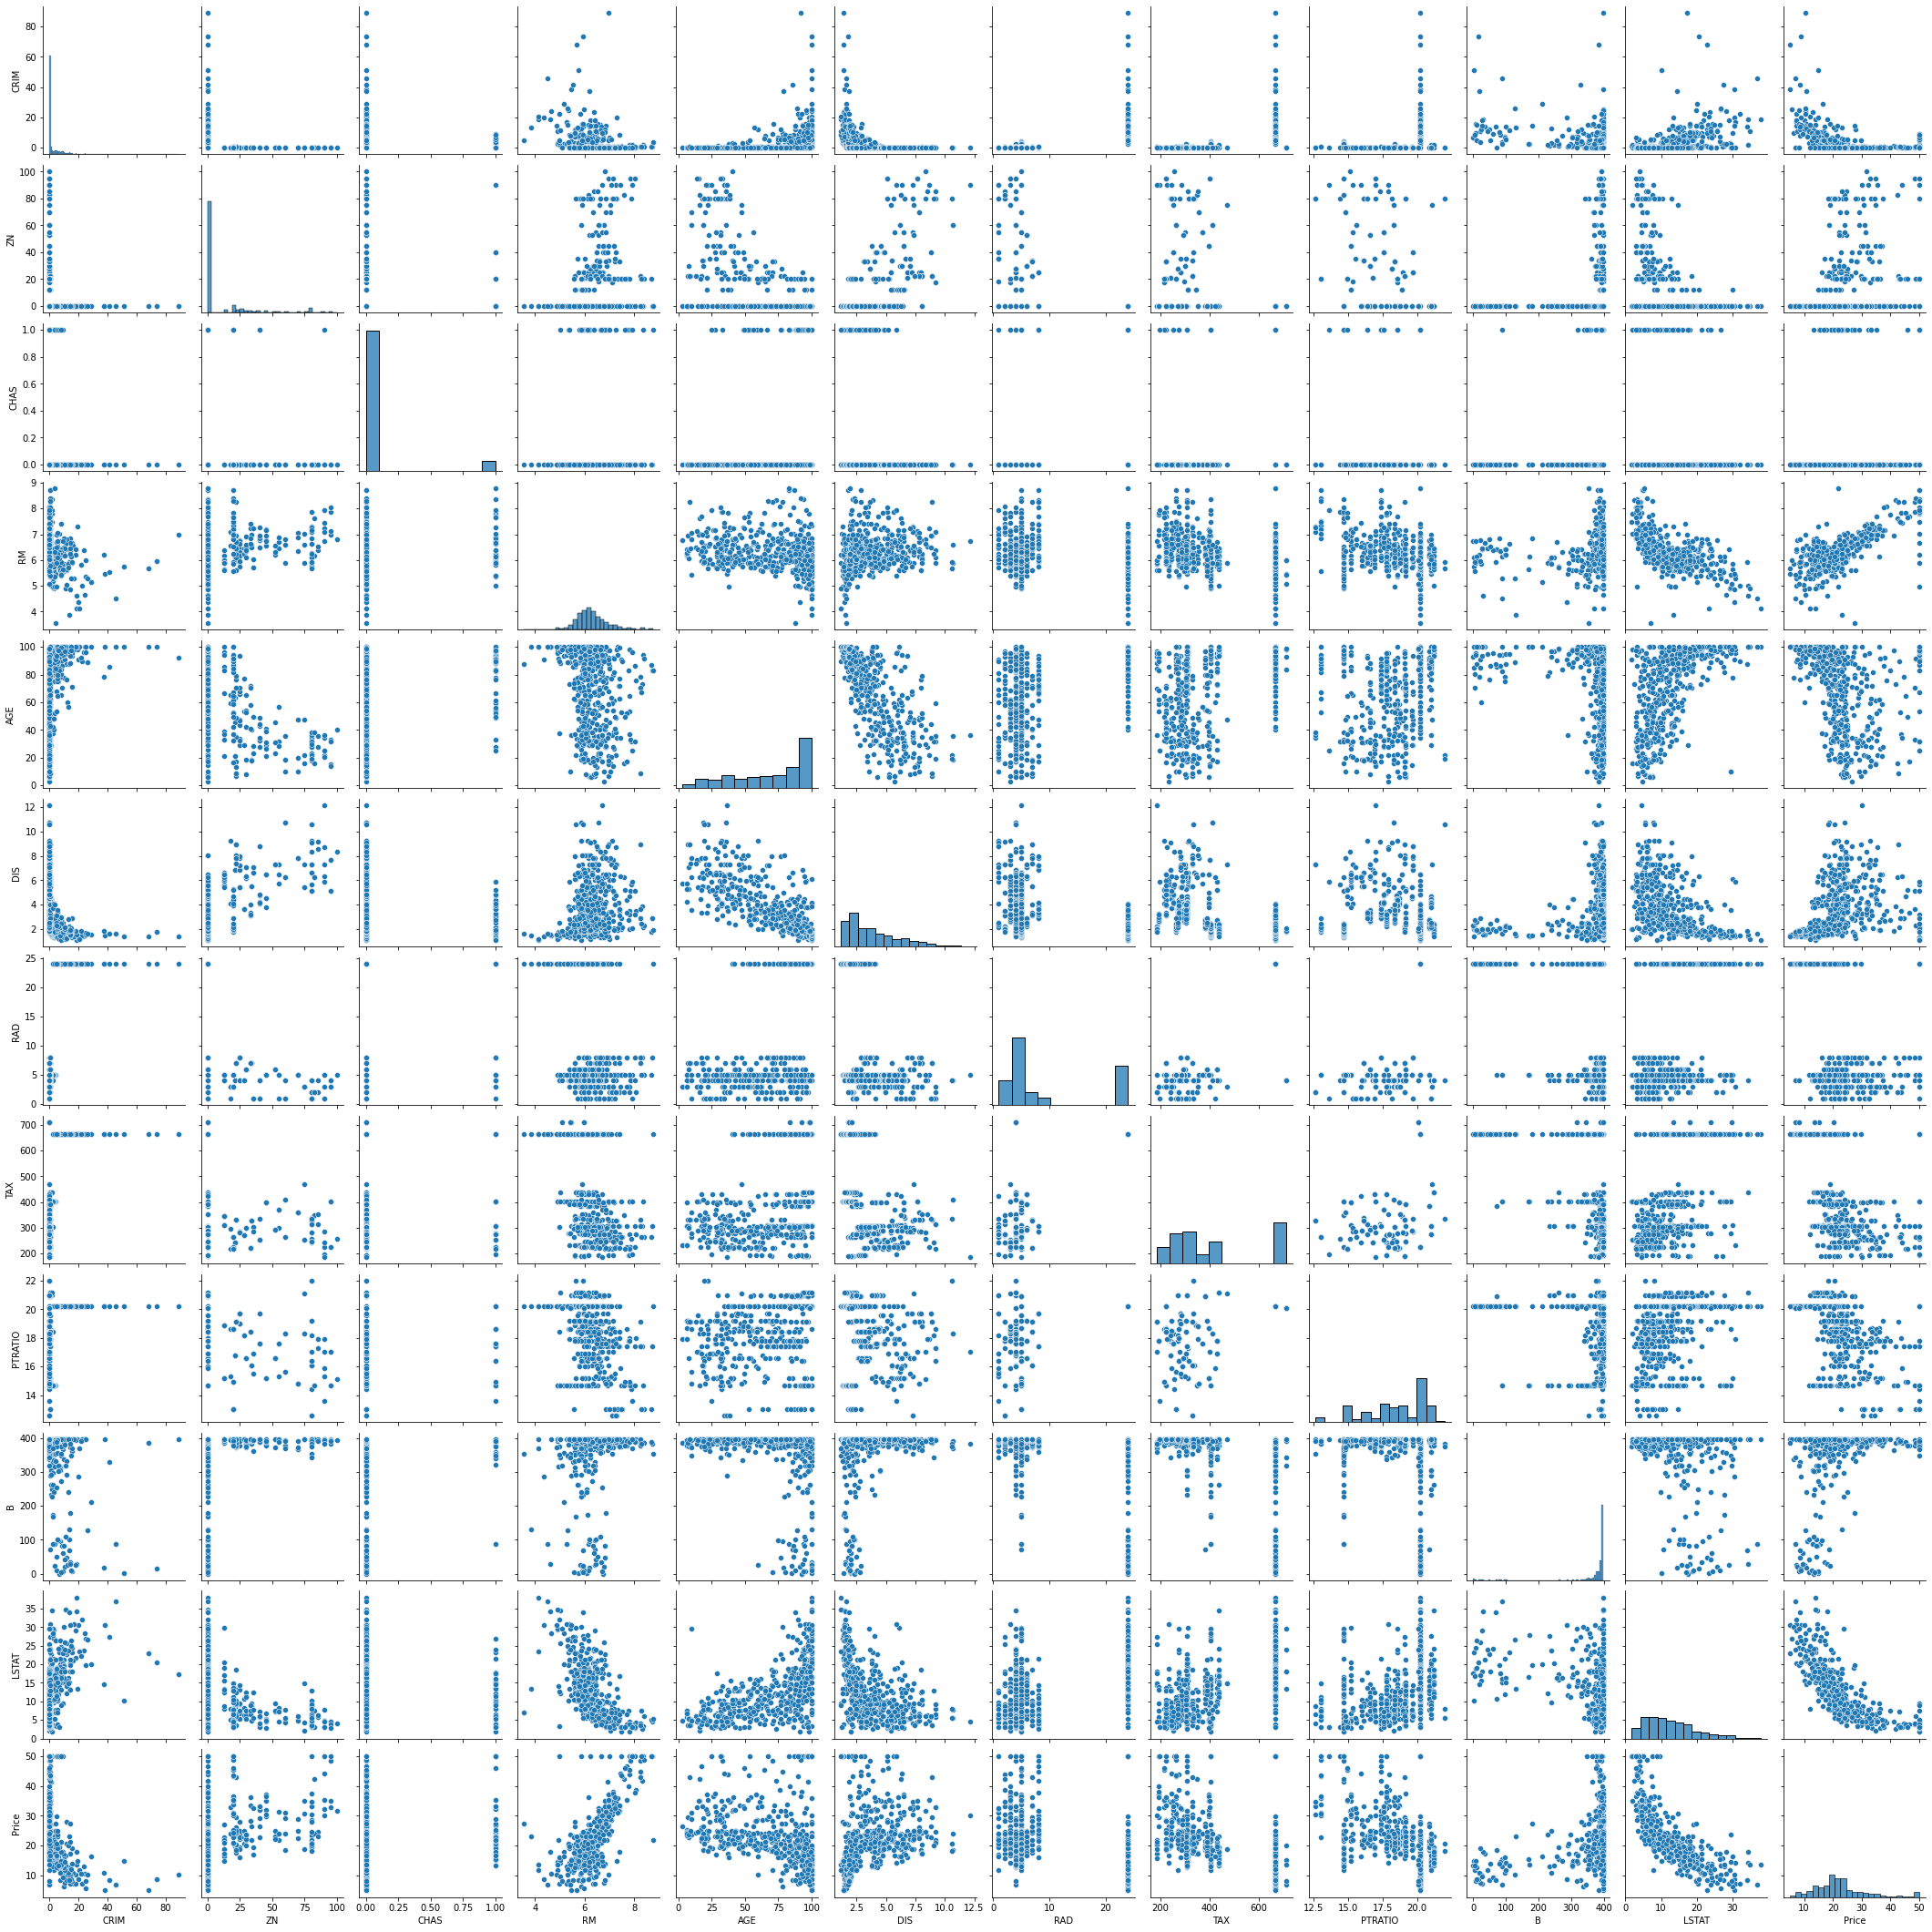

In [145]:
#There are cases of multicolinearity, we will drop a few columns
boston_df.drop(columns = ["INDUS", "NOX"], inplace = True)

#pairplot
sns.pairplot(boston_df)

#we will log the LSTAT Column
boston_df.LSTAT = np.log(boston_df.LSTAT)

In [148]:
## Data Splitting and Scaling
#preview
features = boston_df.columns[0:11]
target = boston_df.columns[-1]

#X and y values
X = boston_df[features].values
y = boston_df[target].values

#splot
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

print("The dimension of X_train is {}".format(X_train.shape))
print("The dimension of X_test is {}".format(X_test.shape))
#Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

The dimension of X_train is (354, 11)
The dimension of X_test is (152, 11)


*Linear Regression*

In [149]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(X_train, y_train)

#predict
#prediction = lr.predict(X_test)

#actual
actual = y_test

train_score_lr = lr.score(X_train, y_train)
test_score_lr = lr.score(X_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))

The train score for lr model is 0.6451071762824847
The test score for lr model is 0.7250499219702484


*Lasso Regression*

In [152]:
#Lasso regression model
print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(X_train,y_train)
train_score_ls =lasso.score(X_train,y_train)
test_score_ls =lasso.score(X_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.0
The test score for ls model is -0.0030704836212473996


<AxesSubplot: >

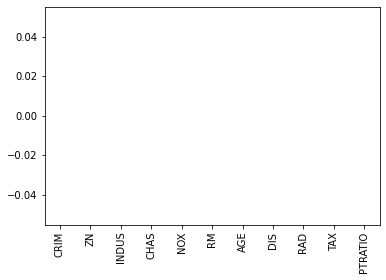

In [153]:
pd.Series(lasso.coef_, features).sort_values(ascending = True).plot(kind = "bar")

*Lasso CV model*

In [154]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10], random_state=0).fit(X_train, y_train)


#score
print(lasso_cv.score(X_train, y_train))
print(lasso_cv.score(X_test, y_test))

0.645054979697989
0.7255165557103279


<a name="l2"></a>
##### (L2) Ridge Regression  

##### Concepts

L2 regularization adds L2-norm $(\alpha\sum_{j=1}^{m}w_j^2)$ to the loss function. L2 regularizes the sum of squares of the weights.

Ridge Regression : $\underset {w}{min}\frac{1}{n}\sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \alpha\sum_{j=1}^{m}w_j^2$

- $\alpha \geq 0$ : controls the amount of shrinkage
    - The larger the value of $\alpha$, the greater the amount of shrinkage.

<img style="float: left;" src=ridge.png width="50%">

1. Contours: the mean squared error loss function (the squared distance between the true andpredicted values) for two weight coefficients,$w_1$ and $w_2$.The goal is to **find the combinations of $w_1$ and $w_2$ that minimize the loss function**.
2. Disk: the quadratic L2 regularization term. The combination of $w_1$ and $w_2$ cannot fall outside the disk.
    - Larger $\alpha$ → narrower disk.
3. Solution:
    - Balance two different losses - cannot decrease either loss without increasing the other.
    - Disk intersects with the contours of the unpenalized loss function. Both $w_1$ and $w_2$ will be penalized but neither is zero.

In [150]:
#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(X_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(X_train, y_train)
test_score_ridge = ridgeReg.score(X_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))


Ridge Model............................................

The train score for ridge model is 0.6434858395387215
The test score for ridge model is 0.7237918203738396


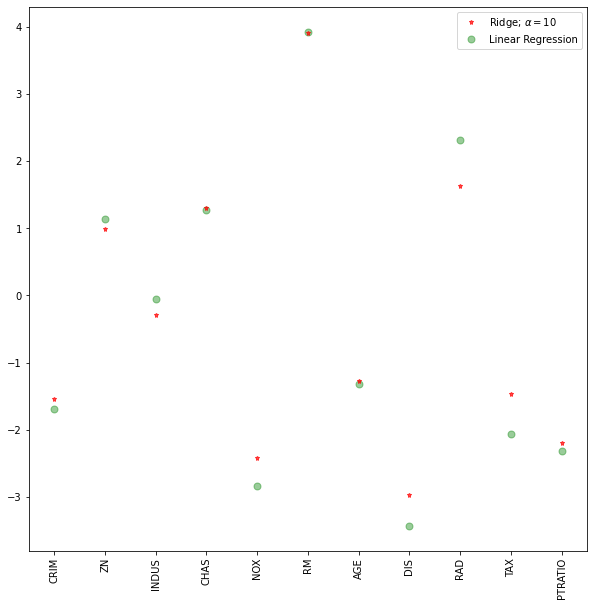

In [151]:
plt.figure(figsize = (10, 10))
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)
#plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$')
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 90)
plt.legend()
plt.show()

In [155]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Ridge Cross validation
ridge_cv = RidgeCV(alphas = [0.0001, 0.001,0.01, 0.1, 1, 10]).fit(X_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train)))
print("The train score for ridge model is {}".format(ridge_cv.score(X_test, y_test)))

The train score for ridge model is 0.6434858395387215
The train score for ridge model is 0.7237918203738398


*Compare performance of Linear Regression, Lasso Regression, Ridge Regression*

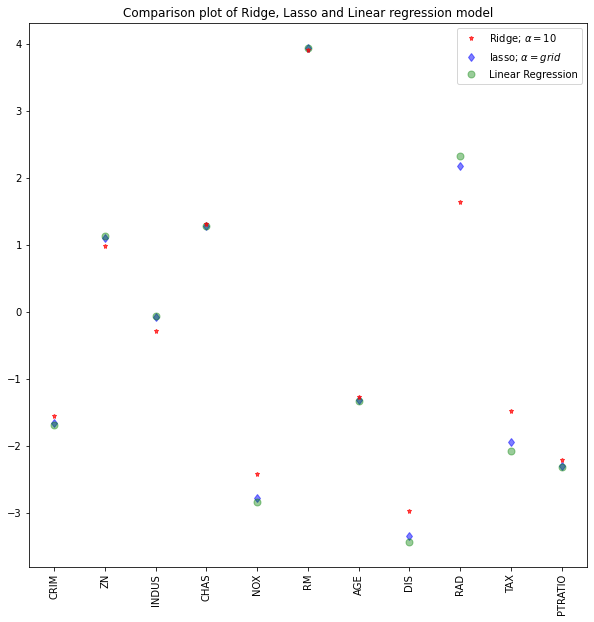

In [156]:
#plot size
plt.figure(figsize = (10, 10))
#add plot for ridge regression
plt.plot(features,ridgeReg.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 10$',zorder=7)

#add plot for lasso regression
plt.plot(lasso_cv.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'lasso; $\alpha = grid$')

#add plot for linear model
plt.plot(features,lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

#rotate axis
plt.xticks(rotation = 90)
plt.legend()
plt.title("Comparison plot of Ridge, Lasso and Linear regression model")
plt.show()

<a name="en"></a>
##### Hybrid of L1 and L2 regularizations: **Elastic net regularization**.

Elastic Net first emerged as a result of critique on lasso, whose variable selection can be too dependent on data and thus unstable. The solution is to combine the penalties of ridge regression and lasso to get the best of both worlds. Elastic Net aims at minimizing the following loss function:

Elastic net regularization : $\underset {w}{min}\frac{1}{2n}\sum_{i=1}^{n} (y_i-\hat{y_i})^2 + \frac{1-\alpha}{2}
\sum_{j=1}^{m}w_j^2 + \alpha\sum_{j=1}^{m}|w_j|$

- $\alpha$ : between ridge ($\alpha = 0 $)and lasso ($\alpha = 1 $)
    - Now, there are two parameters to tune: λ and $\alpha$. The glmnet package allows to tune λ via cross-validation for a fixed $\alpha$, but it does not support $\alpha$-tuning, so we will turn to caret for this job.

<img style="float: left;" src='https://miro.medium.com/v2/resize:fit:761/1*nrWncnoJ4V_BkzEf1pd4MA.png' width="80%">

In [157]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

# Elastic Net regression model
model_enet = ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.1, .5, .7, .9, .95, .99, 1])

# fit the model on training data
model_enet.fit(X_train, y_train)

# train and test score for Elastic Net regression
train_score_enet = model_enet.score(X_train, y_train)
test_score_enet = model_enet.score(X_test, y_test)

# predict the values of training and test data
pred_train_enet = model_enet.predict(X_train)
pred_test_enet = model_enet.predict(X_test)

# calculate root mean squared error and r2 score for training data
rmse_train_enet = np.sqrt(mean_squared_error(y_train, pred_train_enet))
r2_train_enet = r2_score(y_train, pred_train_enet)

# calculate root mean squared error and r2 score for test data
rmse_test_enet = np.sqrt(mean_squared_error(y_test, pred_test_enet))
r2_test_enet = r2_score(y_test, pred_test_enet)

# print the scores
print("\nElastic Net Model............................................\n")
print("The train score for Elastic Net model is {}".format(train_score_enet))
print("The test score for Elastic Net model is {}".format(test_score_enet))
print("The root mean squared error for training data is {}".format(rmse_train_enet))
print("The r2 score for training data is {}".format(r2_train_enet))
print("The root mean squared error for test data is {}".format(rmse_test_enet))
print("The r2 score for test data is {}".format(r2_test_enet))


Elastic Net Model............................................

The train score for Elastic Net model is 0.6448649321273212
The test score for Elastic Net model is 0.7252171321476159
The root mean squared error for training data is 5.591486812646878
The r2 score for training data is 0.6448649321273212
The root mean squared error for test data is 4.564846936656542
The r2 score for test data is 0.7252171321476159


#### 2. For neural networks: **dropout and batch normalization**.

<a name="dt"></a>
**Dropout** : 

At every iteration, it randomly selects some nodes and removes them along with all of their incoming and outgoing connections as shown below. So each iteration has a different set of nodes and this results in a different set of outputs. It can also be thought of as an ensemble technique in machine learning.

Ensemble models usually perform better than a single model as they capture more randomness. Similarly, dropout also performs better than a normal neural network model.

This probability of choosing how many nodes should be dropped is the hyperparameter of the dropout function. As seen in the image above, dropout can be applied to both the hidden layers as well as the input layers.

<img style="float: left;" src='https://cdn.analyticsvidhya.com/wp-content/uploads/2018/04/1IrdJ5PghD9YoOyVAQ73MJw.gif' width="55%">

*Using Dropout on the Visible Layer*

In [169]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout in the input layer with weight constraint
def create_model():
    # create model
    model = Sequential()
    model.add(Dropout(0.2, input_shape=(60,)))
    model.add(Dense(60, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [170]:
# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# evaluate pipeline
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Visible: 85.12% (6.51%)


*Using Dropout on Hidden Layers*

In [171]:
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# load dataset
dataframe = read_csv("sonar.csv", header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:60].astype(float)
Y = dataset[:,60]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

# dropout on hidden layers with weight constraint
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=60, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(30, activation='relu', kernel_constraint=MaxNorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

# create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_model, epochs=300, batch_size=16, verbose=0)))
pipeline = Pipeline(estimators)

# evaluate pipeline
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Visible: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Visible: 84.10% (8.37%)


**Batch Normalization**

Batch normalization is a technique for training very deep neural networks that standardizes the inputs to a layer for each mini-batch. This has the effect of stabilizing the learning process and dramatically reducing the number of training epochs required to train deep networks.

Batch normalization can be implemented during training by calculating the mean and standard deviation of each input variable to a layer per mini-batch and using these statistics to perform the standardization.

<img style="float: middle;" src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*_vYBR0bBHcd-zNQf0c6jpg.png' width="45%">

The benefits of batch normalization are :

- A deep neural network can be trained faster: Although each training iteration will be slower because of the extra normalization calculation during the forward pass and the additional hyperparameters to train during backpropagation, it should converge much more quickly; thus, training should be faster overall.
- Higher learning rate: Gradient descent generally requires small learning rates for the network to converge. As networks become deeper, gradients become smaller during backpropagation and thus require even more iterations. Using batch normalization allows much higher learning rates, thereby increasing the speed of training.
- Easier to initialize weight: Weight initialization can be difficult, particularly when creating deeper networks. Batch normalization reduces the sensitivity to the initial starting weights.

In [209]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [210]:
## Our model has the following specifications:
# The first layer (also known as the input layer) has the input_shape to set the input size (4,)
# The input layer has 64 units, followed by 2 dense layers, each with 128 units. Then there are further 2dense layers, each with 64 units. All these layers use the relu activation function.
# The output Dense layer has 3 units and the softmax activation function.
# We can add batch normalization into our model by adding it in the same way as adding Dense layer.

model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(3, activation='softmax')
]);

BatchNormalization() normalize the activation of the previous layer at each batch and by default, it is using the following values:
- Momentum defaults to 0.99
- The hyperparameter ε defaults to 0.001
- The hyperparameter β defaults to an all-zeros vector
- The hyperparameter γ defaults to an all-ones vector

And we can customize the settings of BatchNormalization() like below : 

In [211]:
from tensorflow.keras.initializers import RandomNormal, Constant
# Model with default batch normalization
model = Sequential([
    Dense(64, input_shape=(4,), activation="relu"),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95, 
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax')
])

In [212]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_140 (Dense)           (None, 64)                320       
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_141 (Dense)           (None, 128)               8320      
                                                                 
 batch_normalization_6 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_142 (Dense)           (None, 128)               16512     
                                                                 
 batch_normalization_7 (Batc  (None, 128)            

In [213]:
## Training
# Let’s now compile and fit our model with batch normalization. We first compile our model with the following specifications
# Use Adam (adam) optimization algorithm as the optimizer
# Use categorical cross-entropy loss function (categorical_crossentropy) for our multiple-class classification problem
# For simplicity, use accuracy as our evaluation metrics to evaluate the model during training and testing.
model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [214]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 5s - loss: 0.8275 - accuracy: 0.6556 - val_loss: 1.1277 - val_accuracy: 0.3000 - 5s/epoch - 2s/step
Epoch 2/200
3/3 - 0s - loss: 0.1846 - accuracy: 0.9889 - val_loss: 1.0922 - val_accuracy: 0.3000 - 61ms/epoch - 20ms/step
Epoch 3/200
3/3 - 0s - loss: 0.1162 - accuracy: 0.9778 - val_loss: 1.0720 - val_accuracy: 0.3333 - 71ms/epoch - 24ms/step
Epoch 4/200
3/3 - 0s - loss: 0.1216 - accuracy: 0.9778 - val_loss: 1.0661 - val_accuracy: 0.3667 - 59ms/epoch - 20ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0377 - accuracy: 1.0000 - val_loss: 1.0688 - val_accuracy: 0.3333 - 50ms/epoch - 17ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0446 - accuracy: 1.0000 - val_loss: 1.0729 - val_accuracy: 0.3333 - 47ms/epoch - 16ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0391 - accuracy: 1.0000 - val_loss: 1.0781 - val_accuracy: 0.3333 - 52ms/epoch - 17ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0421 - accuracy: 0.9889 - val_loss: 1.0868 - val_accuracy: 0.3333 - 51ms/epoch - 17ms/step
Epoch 9/200
3/3 - 0s - loss:

Epoch 68/200
3/3 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2620 - val_accuracy: 0.9667 - 75ms/epoch - 25ms/step
Epoch 69/200
3/3 - 0s - loss: 0.0519 - accuracy: 0.9889 - val_loss: 0.2288 - val_accuracy: 0.9333 - 53ms/epoch - 18ms/step
Epoch 70/200
3/3 - 0s - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.2372 - val_accuracy: 0.9333 - 52ms/epoch - 17ms/step
Epoch 71/200
3/3 - 0s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.2717 - val_accuracy: 0.8667 - 57ms/epoch - 19ms/step
Epoch 72/200
3/3 - 0s - loss: 0.0787 - accuracy: 0.9667 - val_loss: 0.2693 - val_accuracy: 0.8667 - 53ms/epoch - 18ms/step
Epoch 73/200
3/3 - 0s - loss: 0.0512 - accuracy: 0.9778 - val_loss: 0.2336 - val_accuracy: 0.9333 - 64ms/epoch - 21ms/step
Epoch 74/200
3/3 - 0s - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.2395 - val_accuracy: 0.9000 - 48ms/epoch - 16ms/step
Epoch 75/200
3/3 - 0s - loss: 0.0356 - accuracy: 1.0000 - val_loss: 0.2415 - val_accuracy: 0.9333 - 60ms/epoch - 20ms/step
Epoch 76/200
3/3

Epoch 135/200
3/3 - 0s - loss: 0.0218 - accuracy: 0.9889 - val_loss: 0.1673 - val_accuracy: 0.9667 - 67ms/epoch - 22ms/step
Epoch 136/200
3/3 - 0s - loss: 0.0409 - accuracy: 0.9889 - val_loss: 0.1437 - val_accuracy: 0.9667 - 59ms/epoch - 20ms/step
Epoch 137/200
3/3 - 0s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.1255 - val_accuracy: 0.9667 - 57ms/epoch - 19ms/step
Epoch 138/200
3/3 - 0s - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.1245 - val_accuracy: 0.9333 - 56ms/epoch - 19ms/step
Epoch 139/200
3/3 - 0s - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.1276 - val_accuracy: 0.9333 - 48ms/epoch - 16ms/step
Epoch 140/200
3/3 - 0s - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.1285 - val_accuracy: 0.9333 - 51ms/epoch - 17ms/step
Epoch 141/200
3/3 - 0s - loss: 0.0275 - accuracy: 0.9889 - val_loss: 0.1321 - val_accuracy: 0.9333 - 38ms/epoch - 13ms/step
Epoch 142/200
3/3 - 0s - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.1434 - val_accuracy: 0.9333 - 61ms/epoch - 20ms/step
Epoch 14

In [218]:
#Plot the learning curves
#Finally, let’s plot the loss vs. epochs graph on the training and validation sets.

#It is preferable to create a small function for plotting metrics. Let’s go ahead and create a function plot_metric().

%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

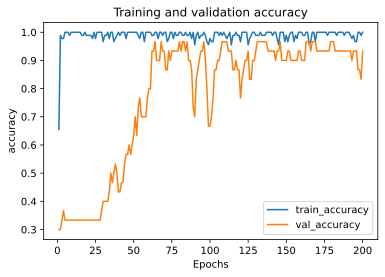

In [215]:
plot_metric(history, 'accuracy')

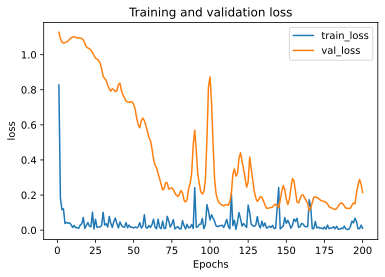

In [216]:
plot_metric(history, 'loss')

In [217]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

1/1 - 0s - loss: 0.1811 - accuracy: 0.9333 - 31ms/epoch - 31ms/step


[0.18106959760189056, 0.9333333373069763]

#### 3. Non-mathematical methods that have a regularization effect: **data augmentation and early stopping**

<a name="da"></a>
##### Data Augmentation 
The simplest way to reduce overfitting is to increase the size of the training data. In machine learning, we were not able to increase the size of training data as the labeled data was too costly.

But, now let’s consider we are dealing with images. In this case, there are a few ways of increasing the size of the training data – **rotating the image, flipping, scaling, shifting, etc**. 

In keras, we can perform all of these transformations using ImageDataGenerator. It has a big list of arguments which you you can use to pre-process your training data.

Five main types of data augmentation techniques for image data:
- Image shifts via the *width_shift_range* and *height_shift_range* arguments.
- Image flips via the *horizontal_flip* and *vertical_flip* arguments.
- Image rotations via the *rotation_range* argument
- Image brightness via the *brightness_range* argument.
- Image zoom via the *zoom_range* argument.

**Horizontal and Vertical Shift Augmentation**

A shift to an image means moving all pixels of the image in one direction, such as horizontally or vertically, while keeping the image dimensions the same.

This means that some of the pixels will be clipped off the image and there will be a region of the image where new pixel values will have to be specified.

The width_shift_range and height_shift_range arguments to the ImageDataGenerator constructor control the amount of horizontal and vertical shift respectively.

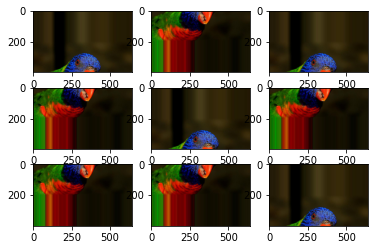

In [177]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = Image.open('/Users/crystal/Desktop/Dimension Reduction/bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(width_shift_range=[-200,200])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    pyplot.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    pyplot.imshow(image)
    # show the figure
pyplot.show()

**Horizontal and Vertical Flip Augmentation:**

An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.

The flip augmentation is specified by a boolean horizontal_flip or vertical_flip argument to the ImageDataGenerator class constructor. For photographs like the bird photograph used in this tutorial, horizontal flips may make sense, but vertical flips would not.

For other types of images, such as aerial photographs, cosmology photographs, and microscopic photographs, perhaps vertical flips make sense.

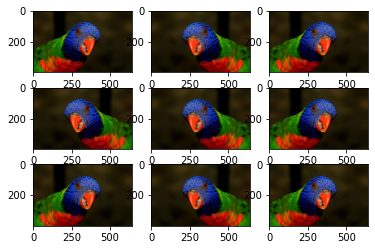

In [178]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = Image.open('/Users/crystal/Desktop/Dimension Reduction/bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(horizontal_flip=True)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

**Random Rotation Augmentation**:

A rotation augmentation randomly rotates the image clockwise by a given number of degrees from 0 to 360.

The rotation will likely rotate pixels out of the image frame and leave areas of the frame with no pixel data that must be filled in.

The example below demonstrates random rotations via the rotation_range argument, with rotations to the image between 0 and 90 degrees.

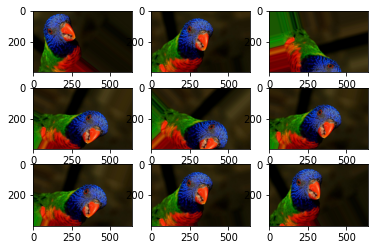

In [179]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = Image.open('/Users/crystal/Desktop/Dimension Reduction/bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator 
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

**Random Brightness Augmentation:**

This can be achieved by specifying the brightness_range argument to the ImageDataGenerator() constructor that specifies min and max range as a float representing a percentage for selecting a brightening amount.

Values less than 1.0 darken the image, e.g. [0.5, 1.0], whereas values larger than 1.0 brighten the image, e.g. [1.0, 1.5], where 1.0 has no effect on brightness.

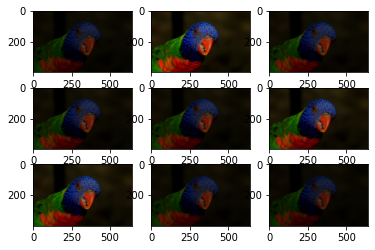

In [180]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = Image.open('/Users/crystal/Desktop/Dimension Reduction/bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

**Random Zoom Augmentation:**

Image zooming can be configured by the zoom_range argument to the ImageDataGenerator constructor. You can specify the percentage of the zoom as a single float or a range as an array or tuple.

If a float is specified, then the range for the zoom will be [1-value, 1+value]. For example, if you specify 0.3, then the range will be [0.7, 1.3], or between 70% (zoom in) and 130% (zoom out).

The zoom amount is uniformly randomly sampled from the zoom region for each dimension (width, height) separately.

The zoom may not feel intuitive. Note that **zoom values less than 1.0 will zoom the image in, e.g. [0.5,0.5] makes the object in the image 50% larger or closer, and values larger than 1.0 will zoom the image out by 50%, e.g. [1.5, 1.5] makes the object in the image smaller or further away**. A zoom of [1.0,1.0] has no effect.

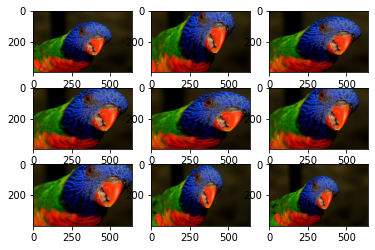

In [181]:
# example of horizontal shift image augmentation
from numpy import expand_dims
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot

# load the image
img = Image.open('/Users/crystal/Desktop/Dimension Reduction/bird.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(zoom_range=[0.5,1.0])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

<a name="es"></a>
##### Early Stopping

Early Stopping monitors the performance of the model for every epoch on a held-out validation set during the training, and terminate the training conditional on the validation performance.

Early Stopping will stop training as soon as the validation error reaches a minimum. The figure below shows a model being trained.

As the epochs go by, the algorithm leans and its error on the training set naturally goes down, and so does its error on the validation set. However, after a while, the validation error stops decreasing and actually starts to go back up. This indicates that the model has started to overfit the training data. With Early Stopping, you just stop training as soon as the validation error reaches the minimum.

<img style="float: left;" src='https://miro.medium.com/v2/resize:fit:1400/format:webp/1*iAK5uMoOlX1gZu-cSh1nZw.png' width="40%">

In [183]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [184]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [185]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

In [186]:
#Finally, let’s split the dataset into a training set (80%)and a test set (20%) using train_test_split() from sklearn library.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [189]:
# Build a neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

In [191]:
# Create the model
model = create_model()

In [192]:
# Compile and train the model
# In order to train a model, we first have to configure our model using compile() and pass the following arguments:

# Use Adam (adam) optimization algorithm as the optimizer
# Use categorical cross-entropy loss function (categorical_crossentropy) for our multiple-class classification problem
# For simplicity, use accuracy as our evaluation metrics to evaluate the model during training and testing.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [193]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.1, epochs=100, batch_size=16, verbose=2)

Epoch 1/100
7/7 - 2s - loss: 1.0331 - accuracy: 0.4167 - val_loss: 0.9639 - val_accuracy: 0.7500 - 2s/epoch - 332ms/step
Epoch 2/100
7/7 - 0s - loss: 0.8436 - accuracy: 0.6667 - val_loss: 0.7189 - val_accuracy: 0.7500 - 82ms/epoch - 12ms/step
Epoch 3/100
7/7 - 0s - loss: 0.6240 - accuracy: 0.6667 - val_loss: 0.4138 - val_accuracy: 1.0000 - 81ms/epoch - 12ms/step
Epoch 4/100
7/7 - 0s - loss: 0.4488 - accuracy: 0.8056 - val_loss: 0.2603 - val_accuracy: 1.0000 - 73ms/epoch - 10ms/step
Epoch 5/100
7/7 - 0s - loss: 0.3109 - accuracy: 0.8889 - val_loss: 0.1528 - val_accuracy: 1.0000 - 63ms/epoch - 9ms/step
Epoch 6/100
7/7 - 0s - loss: 0.2142 - accuracy: 0.9537 - val_loss: 0.1005 - val_accuracy: 1.0000 - 82ms/epoch - 12ms/step
Epoch 7/100
7/7 - 0s - loss: 0.1903 - accuracy: 0.9352 - val_loss: 0.1009 - val_accuracy: 0.9167 - 76ms/epoch - 11ms/step
Epoch 8/100
7/7 - 0s - loss: 0.2155 - accuracy: 0.9167 - val_loss: 0.0545 - val_accuracy: 1.0000 - 80ms/epoch - 11ms/step
Epoch 9/100
7/7 - 0s - los

Epoch 68/100
7/7 - 0s - loss: 0.0763 - accuracy: 0.9630 - val_loss: 0.0343 - val_accuracy: 1.0000 - 51ms/epoch - 7ms/step
Epoch 69/100
7/7 - 0s - loss: 0.0661 - accuracy: 0.9815 - val_loss: 0.1105 - val_accuracy: 0.9167 - 66ms/epoch - 9ms/step
Epoch 70/100
7/7 - 0s - loss: 0.0644 - accuracy: 0.9722 - val_loss: 0.0645 - val_accuracy: 0.9167 - 63ms/epoch - 9ms/step
Epoch 71/100
7/7 - 0s - loss: 0.0543 - accuracy: 0.9907 - val_loss: 0.1289 - val_accuracy: 0.9167 - 62ms/epoch - 9ms/step
Epoch 72/100
7/7 - 0s - loss: 0.0588 - accuracy: 0.9815 - val_loss: 0.0517 - val_accuracy: 1.0000 - 57ms/epoch - 8ms/step
Epoch 73/100
7/7 - 0s - loss: 0.0660 - accuracy: 0.9722 - val_loss: 0.0602 - val_accuracy: 0.9167 - 58ms/epoch - 8ms/step
Epoch 74/100
7/7 - 0s - loss: 0.0909 - accuracy: 0.9722 - val_loss: 0.0191 - val_accuracy: 1.0000 - 62ms/epoch - 9ms/step
Epoch 75/100
7/7 - 0s - loss: 0.1734 - accuracy: 0.9352 - val_loss: 0.0451 - val_accuracy: 1.0000 - 61ms/epoch - 9ms/step
Epoch 76/100
7/7 - 0s - 

In [194]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Test loss: 0.044238608330488205
Test accuracy: 0.9666666388511658


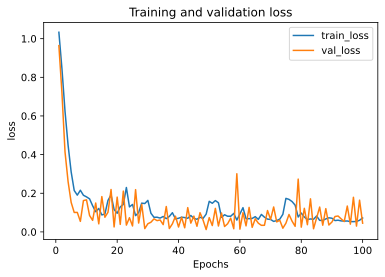

In [197]:
plot_metric(history, 'loss')

From the above graph, we can see that the model has overfitted the training data, so it outperforms the validation set.

**Adding Early Stopping**

EarlyStopping() has a few options and by default:

- monitor='val_loss': to use validation loss as performance measure to terminate the training.
- patience=0: is the number of epochs with no improvement. The value 0 means the training is terminated as soon as the performance measure gets worse from one epoch to the next.
- min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.
- mode='auto': Should be one of auto, min or max. In 'min' mode, training will stop when the quantity monitored has stopped decreasing; in 'max' mode it will stop when the quantity monitored has stopped increasing; in 'auto' mode, the direction is automatically inferred from the name of the monitored quantity.

In [204]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0509 - accuracy: 0.9778 - val_loss: 0.1551 - val_accuracy: 0.9667 - 84ms/epoch - 28ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0499 - accuracy: 0.9778 - val_loss: 0.1221 - val_accuracy: 0.9667 - 46ms/epoch - 15ms/step


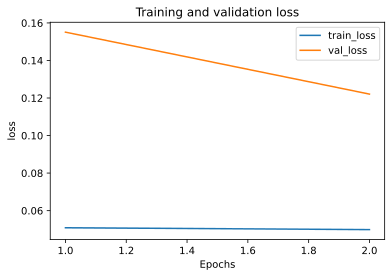

In [205]:
plot_metric(history, 'loss')

In the below graph, validation loss is shown in orange and it’s clear that validation error increases at Epoch 2.

In [206]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [207]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0329 - accuracy: 0.9778 - val_loss: 0.1371 - val_accuracy: 0.9333 - 87ms/epoch - 29ms/step
Epoch 2/200
3/3 - 0s - loss: 0.0370 - accuracy: 0.9889 - val_loss: 0.2389 - val_accuracy: 0.9000 - 50ms/epoch - 17ms/step
Epoch 3/200
3/3 - 0s - loss: 0.0519 - accuracy: 0.9778 - val_loss: 0.1295 - val_accuracy: 0.9333 - 46ms/epoch - 15ms/step
Epoch 4/200
3/3 - 0s - loss: 0.0399 - accuracy: 0.9778 - val_loss: 0.1207 - val_accuracy: 0.9667 - 59ms/epoch - 20ms/step
Epoch 5/200
3/3 - 0s - loss: 0.0356 - accuracy: 0.9778 - val_loss: 0.1192 - val_accuracy: 0.9667 - 73ms/epoch - 24ms/step
Epoch 6/200
3/3 - 0s - loss: 0.0323 - accuracy: 0.9778 - val_loss: 0.1229 - val_accuracy: 0.9333 - 71ms/epoch - 24ms/step
Epoch 7/200
3/3 - 0s - loss: 0.0300 - accuracy: 0.9889 - val_loss: 0.1293 - val_accuracy: 0.9333 - 71ms/epoch - 24ms/step
Epoch 8/200
3/3 - 0s - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.1308 - val_accuracy: 0.9333 - 59ms/epoch - 20ms/step
Epoch 9/200
3/3 - 0s - l

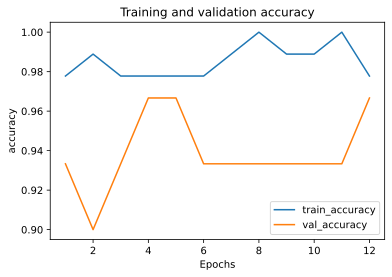

In [208]:
plot_metric(history, 'accuracy')